In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"arulinsan","key":"b1161079bee22dd2b92bd09fa9315229"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [ ]:
!kaggle datasets download -d atharvaingle/crop-recommendation-dataset

Dataset URL: https://www.kaggle.com/datasets/atharvaingle/crop-recommendation-dataset
License(s): unknown
  0% 0.00/63.7k [00:00<?, ?B/s]
100% 63.7k/63.7k [00:00<00:00, 737kB/s]


In [ ]:
!mkdir crop-recommendation-dataset
!unzip crop-recommendation-dataset.zip -d crop-recommendation-dataset
!ls crop-recommendation-dataset

Archive:  crop-recommendation-dataset.zip
  inflating: crop-recommendation-dataset/Crop_recommendation.csv  
Crop_recommendation.csv


In [ ]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

import tensorflow as tf
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam

In [ ]:
df = pd.read_csv('crop-recommendation-dataset/Crop_recommendation.csv')

In [ ]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [ ]:
df_count = df.groupby("label")
df_count["label"].count()

label
apple          100
banana         100
blackgram      100
chickpea       100
coconut        100
coffee         100
cotton         100
grapes         100
jute           100
kidneybeans    100
lentil         100
maize          100
mango          100
mothbeans      100
mungbean       100
muskmelon      100
orange         100
papaya         100
pigeonpeas     100
pomegranate    100
rice           100
watermelon     100
Name: label, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


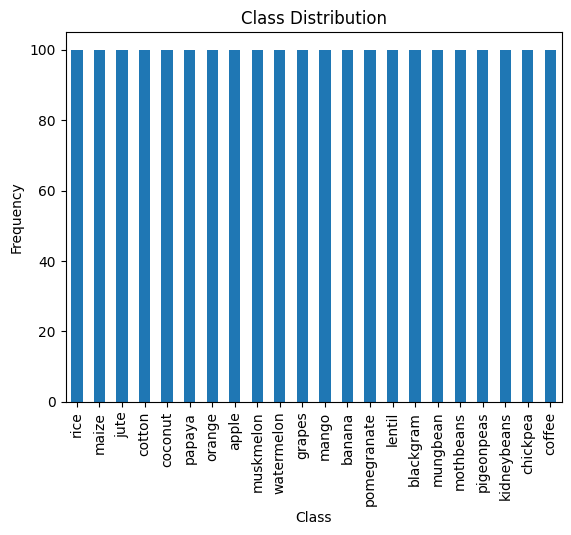

In [ ]:
import matplotlib.pyplot as plt

df['label'].value_counts().plot(kind='bar')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

In [ ]:
label_encoder = preprocessing.LabelEncoder()

df['label_encoded']= label_encoder.fit_transform(df['label'])

In [ ]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label,label_encoded
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,20
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,20
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,20
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,20
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,20


In [ ]:
X=df.drop(['label','label_encoded'],axis=1)
y=df['label_encoded']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0)
print('train shape :', X_train.shape)
print("test shape :", X_test.shape)

train shape : (1760, 7)
test shape : (440, 7)


In [ ]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
ann = Sequential()
ann.add(Dense(32, input_shape=(7,), activation='relu'))
ann.add(Dense(16, activation='relu'))
ann.add(Dense(22, activation='softmax'))

In [ ]:
ann.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=['accuracy'])

In [ ]:
ann.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                256       
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 22)                374       
                                                                 
Total params: 1158 (4.52 KB)
Trainable params: 1158 (4.52 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


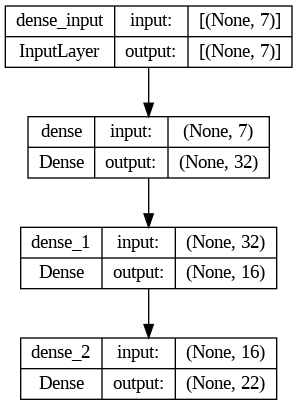

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(ann, show_shapes = True)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
ann.fit(x=X_train,y=y_train,batch_size=50,epochs = 300,validation_split=0.2, callbacks=[early_stopping])

Epoch 1/300
29/29 [==============================] - 3s 42ms/step - loss: 2.9750 - accuracy: 0.1371 - val_loss: 2.8755 - val_accuracy: 0.2045
Epoch 2/300
29/29 [==============================] - 0s 16ms/step - loss: 2.7549 - accuracy: 0.2614 - val_loss: 2.6800 - val_accuracy: 0.2812
Epoch 3/300
29/29 [==============================] - 0s 8ms/step - loss: 2.5386 - accuracy: 0.3281 - val_loss: 2.4743 - val_accuracy: 0.3381
Epoch 4/300
29/29 [==============================] - 0s 8ms/step - loss: 2.3069 - accuracy: 0.4347 - val_loss: 2.2569 - val_accuracy: 0.4460
Epoch 5/300
29/29 [==============================] - 0s 17ms/step - loss: 2.0794 - accuracy: 0.5043 - val_loss: 2.0293 - val_accuracy: 0.4830
Epoch 6/300
29/29 [==============================] - 0s 13ms/step - loss: 1.8476 - accuracy: 0.5632 - val_loss: 1.7920 - val_accuracy: 0.5483
Epoch 7/300
29/29 [==============================] - 0s 12ms/step - loss: 1.6159 - accuracy: 0.6087 - val_loss: 1.5521 - val_accuracy: 0.5795
Epoch 8/

In [ ]:
from sklearn.metrics import accuracy_score
pred = np.argmax(ann.predict(X_test), axis =1)
print(accuracy_score(y_test, pred))

14/14 [==============================] - 0s 4ms/step
0.9886363636363636


In [ ]:
eval = ann.evaluate(X_test,y_test)
print(eval)

14/14 [==============================] - 0s 3ms/step - loss: 0.0417 - accuracy: 0.9886
[0.041706062853336334, 0.9886363744735718]


In [ ]:
preds=ann.predict(X_test)

14/14 [==============================] - 0s 2ms/step


In [ ]:
y_pred=[]
for x in preds:
    y_pred.append(np.argmax(x))
print(y_pred)

[21, 21, 7, 3, 2, 20, 13, 9, 15, 1, 13, 5, 10, 14, 12, 0, 5, 10, 5, 12, 4, 2, 9, 20, 6, 5, 10, 16, 13, 9, 19, 20, 11, 15, 4, 6, 12, 12, 21, 13, 11, 2, 18, 21, 18, 14, 9, 9, 6, 14, 13, 2, 0, 15, 18, 1, 17, 12, 10, 6, 16, 14, 21, 20, 15, 0, 7, 5, 0, 16, 4, 19, 9, 6, 7, 13, 3, 11, 8, 12, 20, 2, 21, 21, 15, 6, 11, 10, 13, 17, 2, 8, 14, 7, 14, 11, 5, 8, 10, 3, 16, 8, 14, 1, 1, 20, 21, 5, 18, 15, 15, 12, 5, 7, 16, 19, 14, 10, 11, 8, 19, 10, 16, 3, 3, 2, 19, 16, 3, 17, 13, 13, 15, 14, 11, 14, 4, 19, 16, 2, 10, 7, 0, 5, 3, 0, 8, 12, 21, 17, 16, 4, 13, 1, 19, 3, 21, 2, 0, 8, 10, 18, 8, 9, 9, 15, 20, 15, 1, 16, 18, 0, 13, 4, 6, 14, 9, 19, 17, 16, 20, 17, 17, 9, 9, 1, 4, 18, 20, 17, 11, 8, 13, 20, 11, 5, 18, 4, 3, 12, 4, 19, 11, 13, 13, 16, 15, 11, 18, 1, 3, 2, 18, 16, 13, 14, 12, 17, 15, 19, 8, 20, 2, 17, 2, 5, 11, 5, 16, 20, 13, 14, 16, 9, 19, 4, 12, 14, 6, 20, 3, 14, 0, 18, 2, 20, 21, 2, 19, 16, 11, 7, 3, 18, 8, 17, 19, 5, 12, 13, 8, 21, 19, 20, 7, 4, 8, 10, 3, 5, 5, 17, 19, 11, 20, 3, 18, 16,

In [ ]:
means = df.drop(['label'],axis=1).mean()
# Hitung standar deviasi dari setiap kolom
stds = df.drop(['label'],axis=1).std()

print("Nilai rata-rata:")
print(means)
print("\nStandar deviasi:")
print(stds)

Nilai rata-rata:
N                 50.551818
P                 53.362727
K                 48.149091
temperature       25.616244
humidity          71.481779
ph                 6.469480
rainfall         103.463655
label_encoded     10.500000
dtype: float64

Standar deviasi:
N                36.917334
P                32.985883
K                50.647931
temperature       5.063749
humidity         22.263812
ph                0.773938
rainfall         54.958389
label_encoded     6.345731
dtype: float64


In [ ]:
df

,N,P,K,temperature,humidity,ph,rainfall,label,label_encoded
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,20
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,20
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,20
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,20
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,20
...,...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee,5
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee,5
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee,5
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee,5


In [ ]:
import numpy as np
import random

input_data = (random.randint(0,100), random.randint(0,100), random.randint(0,100), random.randint(0,35), random.randint(0,100), random.randint(0,8), random.randint(0,300))

input_data_as_numpy_array = np.array(input_data)

input_data_reshape = input_data_as_numpy_array.reshape(1, -1)
input_data_reshape_scaled = sc.transform(input_data_reshape)

prediction = ann.predict(input_data_reshape_scaled)

crop_names = ['apple', 'banana', 'blackgram', 'chickpea', 'coconut', 'coffee', 'cotton', 'grapes', 'juite', 'kidneybeans', 'lentil', 'maize', 'mango', 'mothbeans', 'mungbean', 'muskmelon', 'orange', 'papaya', 'pigeonpeas', 'pomegranate', 'rice', 'watermelon']

predicted_crop_index = np.argmax(prediction)
print(input_data)
print(crop_names[predicted_crop_index])
print(predicted_crop_index)

1/1 [==============================] - 0s 19ms/step
(92, 92, 95, 0, 30, 8, 67)
chickpea
3


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label,label_encoded
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,20
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,20
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,20
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,20
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,20


In [ ]:
ann.save('./crop.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
model = tf.keras.models.load_model('./crop.h5')
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_model = converter.convert()
open("./crop.tflite","wb").write(tflite_model)

6728